In [26]:
import pandas as pd
import numpy as np
import os.path
from datetime import datetime
import matplotlib.pyplot as plt

base_path = '../dataset'

original_data = os.path.join(base_path, 'original_data')
processed_data = os.path.join(base_path, 'processed_data')

In [27]:
candidate_items=pd.read_csv(os.path.join(original_data, "candidate_items.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id").to_numpy()

### Candidates count

In [28]:
candidate_items.size

4990

In [29]:
train_sessions_items=pd.read_csv(os.path.join(original_data,"train_sessions.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id").to_numpy()
train_purchases_items=pd.read_csv(os.path.join(original_data,"train_purchases.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id").to_numpy()

### Session count

In [30]:
train_sessions_items.size

23496

In [65]:
df=pd.read_csv(os.path.join(original_data,"train_sessions.csv")).drop_duplicates().sort_values(by="date")
df['date'] = pd.to_datetime(df['date'])
df.size()

TypeError: 'numpy.int64' object is not callable

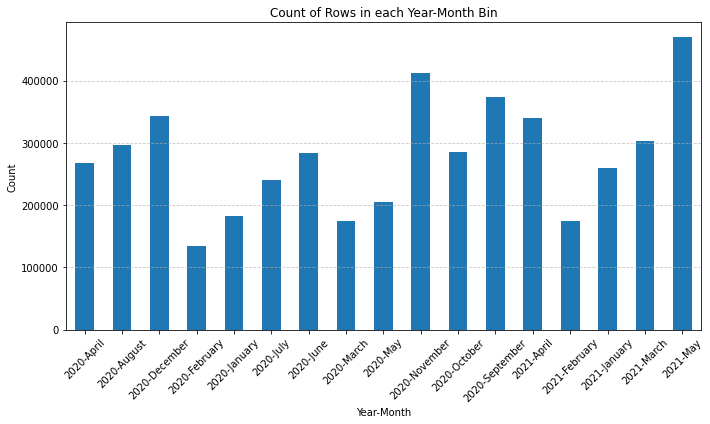

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'item_id' and 'date' columns
# Make sure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year_month'] = df['date'].dt.strftime('%Y-%B')

# Group by 'year_month' and count the rows in each group
year_month_counts = df.groupby('year_month').size()

# Sort by date
year_month_counts = year_month_counts.sort_index()

# Plot histogram
plt.figure(figsize=(10, 6))
year_month_counts.plot(kind='bar')
plt.title('Count of Rows in each Year-Month Bin')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

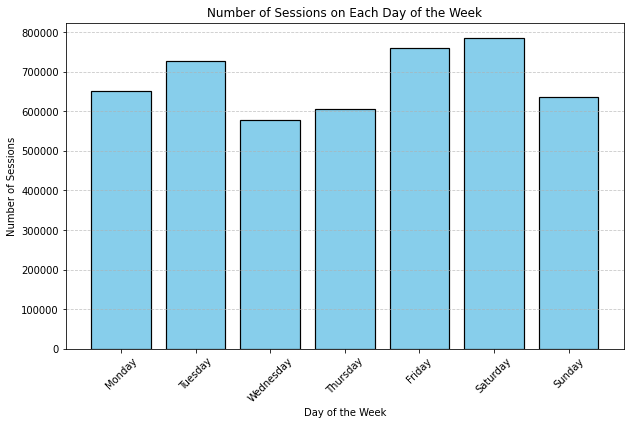

In [38]:
# Extract day of the week from the 'date' column (Monday=0, Sunday=6)
df['day_of_week'] = df['date'].dt.dayofweek

# Count the number of sessions for each day of the week
sessions_per_day = df['day_of_week'].value_counts().sort_index()

# Define the days of the week labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, sessions_per_day, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Number of Sessions on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

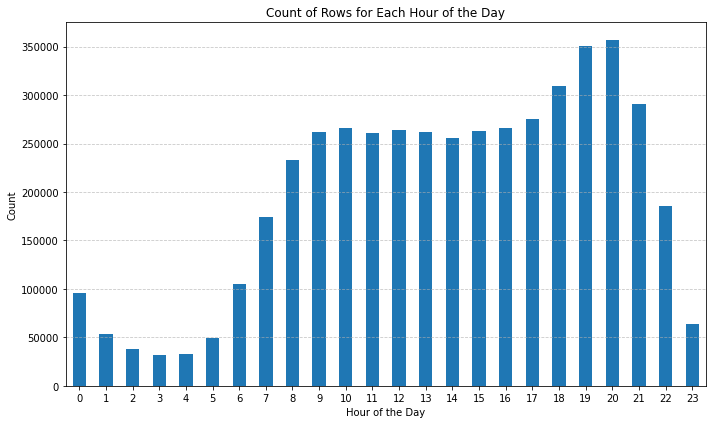

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'item_id' and 'date' columns
# Make sure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract hour of the day
df['hour_of_day'] = df['date'].dt.hour

# Group by 'hour_of_day' and count the rows in each group
hourly_counts = df.groupby('hour_of_day').size()

# Plot histogram
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Count of Rows for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
df.head()

,session_id,item_id,date,month,year,day_of_week,month_year,year_month,hour_of_day
4005618,3747794,11234,2020-01-01 00:00:01.359,January,2020,2,January-2020,2020-January,0
3699175,3458777,3868,2020-01-01 00:00:21.440,January,2020,2,January-2020,2020-January,0
4005616,3747794,9214,2020-01-01 00:00:22.294,January,2020,2,January-2020,2020-January,0
4649622,4350716,10861,2020-01-01 00:00:48.505,January,2020,2,January-2020,2020-January,0
4005614,3747794,27092,2020-01-01 00:02:14.538,January,2020,2,January-2020,2020-January,0


In [6]:
test_sessions_items=pd.read_csv(os.path.join(original_data,"test_final_sessions.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id").to_numpy()
test_sessions_items[:5]

array([[ 3],
       [ 4],
       [ 8],
       [ 9],
       [19]])

In [7]:
test_sessions_leaderboard_items=pd.read_csv(os.path.join(original_data,"test_leaderboard_sessions.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id").to_numpy()
test_sessions_leaderboard_items[:5]

array([[ 4],
       [ 8],
       [ 9],
       [19],
       [20]])

In [8]:
total_test_items = np.concatenate((test_sessions_leaderboard_items, test_sessions_items))

In [9]:
InTestButNotInTrain=np.setdiff1d(total_test_items,train_sessions_items)
InTestButNotInTrain

array([  313,   366,   575,  1152,  1364,  1883,  2497,  2523,  2677,
        2694,  3185,  3529,  3754,  3835,  4042,  4514,  5214,  5394,
        6171,  6853,  6873,  6916,  7204,  7780,  8758,  8771,  9384,
        9418,  9589, 10463, 10671, 11125, 11933, 12667, 13376, 13618,
       13943, 13972, 14395, 14622, 14723, 14967, 15601, 15629, 16206,
       17046, 17206, 18482, 18690, 18837, 19637, 21241, 21444, 21904,
       21927, 21998, 22030, 22316, 22703, 22746, 24303, 25035, 25277,
       25521, 26232, 26742, 27377, 27728, 27826])

In [10]:
print(len(InTestButNotInTrain)," items are in test sessions but not in train")

69  items are in test sessions but not in train


In [11]:
np.intersect1d(InTestButNotInTrain,train_purchases_items)
#None of those 67 items is seen in the train_purchases, so they are unknown items, should be treated in a special way

array([], dtype=int64)

In [12]:
CandidateNeverBoughtInTrainingSet=np.setdiff1d(candidate_items,train_purchases_items)
CandidateNeverBoughtInTrainingSet

array([  221,   313,   344,   366,   575,   950,  1152,  1222,  1364,
        1883,  1935,  2411,  2489,  2497,  2523,  2621,  2677,  2694,
        3185,  3220,  3529,  3754,  3835,  4042,  4514,  6171,  6425,
        6512,  6853,  6873,  6916,  7204,  7321,  7408,  7710,  7780,
        8053,  8758,  8814,  8839,  8928,  9384,  9418,  9589,  9974,
       10463, 10491, 10496, 10671, 10694, 11125, 11862, 11933, 12438,
       12641, 12667, 13376, 13550, 13618, 13788, 13943, 13972, 14167,
       14395, 14535, 14723, 15629, 15719, 16045, 16092, 16206, 16800,
       17046, 17057, 17206, 17371, 17534, 17576, 17950, 18837, 19808,
       20237, 21056, 21241, 21444, 21599, 21904, 21998, 22096, 22143,
       22316, 22583, 22703, 22746, 22838, 23640, 23981, 24239, 24303,
       25035, 25179, 25277, 25298, 25521, 26201, 26232, 26742, 27042,
       27377, 27427, 27728, 27826, 27847])

In [13]:
len(CandidateNeverBoughtInTrainingSet)

113

In [14]:
SeenInTrainSessions=np.intersect1d(CandidateNeverBoughtInTrainingSet,train_sessions_items)
SeenInTrainSessions

array([  221,   344,   950,  1222,  1935,  2411,  2489,  2621,  3220,
        6425,  6512,  7321,  7408,  7710,  8053,  8839,  8928,  9974,
       10491, 10496, 10694, 11862, 12438, 12641, 13550, 13788, 14167,
       14535, 15719, 16045, 16092, 16800, 17057, 17371, 17534, 17950,
       19808, 21056, 21599, 22096, 22143, 22583, 22838, 23640, 23981,
       24239, 25179, 25298, 27042, 27427, 27847])

In [15]:
len(SeenInTrainSessions)

51

In [16]:
data=np.concatenate((candidate_items,train_purchases_items,train_sessions_items,test_sessions_items,test_sessions_leaderboard_items))


In [17]:
df=pd.DataFrame(columns=["item_id"],data=data,index=[i for i,_ in enumerate(data)]).drop_duplicates().reset_index()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    23691 non-null  int64
 1   item_id  23691 non-null  int64
dtypes: int64(2)
memory usage: 370.3 KB


In [19]:
df["code"]=df.index
df["code"]+=1

In [20]:
del df["index"]

In [21]:
df.to_csv(os.path.join(processed_data,"map.csv"),index=False)

In [22]:
df[:19021].to_csv(os.path.join(processed_data,"map_purchases.csv"),index=False) # Mapping of only bought items

In [23]:
train_sessions=pd.read_csv(os.path.join(original_data,"train_sessions.csv"),parse_dates=['date'],
                         infer_datetime_format=True,header=0)

train_sessions_ids=train_sessions.sort_values("date").drop_duplicates("session_id",keep='first')["session_id"]
train_sessions_ids=train_sessions_ids.reset_index()
train_sessions_ids["index"]=train_sessions_ids.index
train_sessions_ids.to_csv(os.path.join(processed_data,"sessions_map.csv"),index=False)

In [24]:
test_final_sessions=pd.read_csv(os.path.join(original_data,"test_final_sessions.csv"))
test_leaderboard_sessions=pd.read_csv(os.path.join(original_data,"test_leaderboard_sessions.csv"))
test_sessions=pd.concat([test_final_sessions,test_leaderboard_sessions],axis=0)

test_sessions_ids=test_sessions.sort_values("date").drop_duplicates("session_id",keep='first')["session_id"]
test_sessions_ids=test_sessions_ids.reset_index()
test_sessions_ids["index"]=test_sessions_ids.index
test_sessions_ids.to_csv(os.path.join(processed_data,"test_sessions_map.csv"),index=False)

In [25]:
candidate_items=pd.read_csv(os.path.join(original_data,"candidate_items.csv"))
candidate_items=candidate_items.merge(df,on="item_id",how="left")
candidate_items["item_id"]=candidate_items["code"]
del candidate_items["code"]
candidate_items.to_csv(os.path.join(processed_data,"candidate_items_mapped.csv"),index=False)

In [26]:
test_final_sessions=pd.read_csv(os.path.join(original_data,"test_final_sessions.csv"))
test_final_sessions=test_final_sessions.merge(df,on="item_id",how="left")
test_final_sessions["item_id"]=test_final_sessions["code"]
del test_final_sessions["code"]
test_final_sessions=test_final_sessions.merge(test_sessions_ids,on="session_id",how="left")
test_final_sessions["session_id"]=test_final_sessions["index"]
del test_final_sessions["index"]
test_final_sessions.to_csv(os.path.join(processed_data,"test_final_sessions_full_mapped.csv"),index=False)

In [27]:
test_final_sessions=pd.read_csv(os.path.join(original_data,"test_final_sessions.csv"))
test_final_sessions=test_final_sessions.merge(df,on="item_id",how="left")
test_final_sessions["item_id"]=test_final_sessions["code"]
del test_final_sessions["code"]
test_final_sessions.to_csv(os.path.join(processed_data,"test_final_sessions_mapped.csv"),index=False)

In [28]:
test_leaderboard_sessions=pd.read_csv(os.path.join(original_data,"test_leaderboard_sessions.csv"))
test_leaderboard_sessions=test_leaderboard_sessions.merge(df,on="item_id",how="left")
test_leaderboard_sessions["item_id"]=test_leaderboard_sessions["code"]
del test_leaderboard_sessions["code"]
test_leaderboard_sessions=test_leaderboard_sessions.merge(test_sessions_ids,on="session_id",how="left")
test_leaderboard_sessions["session_id"]=test_leaderboard_sessions["index"]
del test_leaderboard_sessions["index"]
test_leaderboard_sessions.to_csv(os.path.join(processed_data,"test_leaderboard_sessions_full_mapped.csv"),index=False)

In [29]:
test_leaderboard_sessions=pd.read_csv(os.path.join(original_data,"test_leaderboard_sessions.csv"))
test_leaderboard_sessions=test_leaderboard_sessions.merge(df,on="item_id",how="left")
test_leaderboard_sessions["item_id"]=test_leaderboard_sessions["code"]
del test_leaderboard_sessions["code"]
test_leaderboard_sessions.to_csv(os.path.join(processed_data,"test_leaderboard_sessions_mapped.csv"),index=False)

In [30]:
train_purchases=pd.read_csv(os.path.join(original_data,"train_purchases.csv"))
train_purchases=train_purchases.merge(df,on="item_id",how="left")
train_purchases["item_id"]=train_purchases["code"]
del train_purchases["code"]
train_purchases=train_purchases.merge(train_sessions_ids,on="session_id",how="left")
train_purchases["session_id"]=train_purchases["index"]
del train_purchases["index"]
train_purchases.to_csv(os.path.join(processed_data,"train_purchases_mapped.csv"),index=False)

In [31]:
train_sessions=pd.read_csv(os.path.join(original_data,"train_sessions.csv"))
train_sessions=train_sessions.merge(df,on="item_id",how="left")
train_sessions["item_id"]=train_sessions["code"]
del train_sessions["code"]
train_sessions=train_sessions.merge(train_sessions_ids,on="session_id",how="left")
train_sessions["session_id"]=train_sessions["index"]
del train_sessions["index"]
train_sessions.to_csv(os.path.join(processed_data,"train_sessions_mapped.csv"),index=False)

In [32]:
item_features=pd.read_csv(os.path.join(original_data,"item_features.csv"))
item_features=item_features.merge(df,on="item_id",how="left")
item_features["item_id"]=item_features["code"]
del item_features["code"]
item_features.to_csv(os.path.join(processed_data,"item_features_mapped.csv"),index=False)

In [33]:
train_sessions=pd.read_csv(os.path.join(original_data,"train_sessions.csv"),parse_dates=['date'],
                         infer_datetime_format=True,header=0)


last_month_start = datetime.strptime("01/05/21 00:00:00", '%d/%m/%y %H:%M:%S')

train_sessions_train_split=train_sessions[train_sessions["date"]<last_month_start]


train_sessions_train_split=train_sessions_train_split.merge(df,on="item_id",how="left")
train_sessions_train_split["item_id"]=train_sessions_train_split["code"]
del train_sessions_train_split["code"]
train_sessions_train_split=train_sessions_train_split.merge(train_sessions_ids,on="session_id",how="left")
train_sessions_train_split["session_id"]=train_sessions_train_split["index"]
del train_sessions_train_split["index"]
train_sessions_train_split.to_csv(os.path.join(processed_data,"train_sessions_train_split_mapped.csv"),index=False)

train_sessions_valid_split=train_sessions[train_sessions["date"]>=last_month_start]


train_sessions_valid_split=train_sessions_valid_split.merge(df,on="item_id",how="left")
train_sessions_valid_split["item_id"]=train_sessions_valid_split["code"]
del train_sessions_valid_split["code"]
train_sessions_valid_split=train_sessions_valid_split.merge(train_sessions_ids,on="session_id",how="left")
train_sessions_valid_split["session_id"]=train_sessions_valid_split["index"]
del train_sessions_valid_split["index"]
train_sessions_valid_split.to_csv(os.path.join(processed_data,"train_sessions_valid_split_mapped.csv"),index=False)

In [34]:
train_purchases=pd.read_csv(os.path.join(original_data,"train_purchases.csv"),parse_dates=['date'],
                         infer_datetime_format=True,header=0)


last_month_start = datetime.strptime("01/05/21 00:00:00", '%d/%m/%y %H:%M:%S')

train_purchases_train_split=train_purchases[train_purchases["date"]<last_month_start]


train_purchases_train_split=train_purchases_train_split.merge(df,on="item_id",how="left")
train_purchases_train_split["item_id"]=train_purchases_train_split["code"]
del train_purchases_train_split["code"]
train_purchases_train_split=train_purchases_train_split.merge(train_sessions_ids,on="session_id",how="left")
train_purchases_train_split["session_id"]=train_purchases_train_split["index"]
del train_purchases_train_split["index"]
train_purchases_train_split.to_csv(os.path.join(processed_data,"train_purchases_train_split_mapped.csv"),index=False)

train_purchases_valid_split=train_purchases[train_purchases["date"]>=last_month_start]


train_purchases_valid_split=train_purchases_valid_split.merge(df,on="item_id",how="left")
train_purchases_valid_split["item_id"]=train_purchases_valid_split["code"]
del train_purchases_valid_split["code"]
train_purchases_valid_split=train_purchases_valid_split.merge(train_sessions_ids,on="session_id",how="left")
train_purchases_valid_split["session_id"]=train_purchases_valid_split["index"]
del train_purchases_valid_split["index"]
train_purchases_valid_split.to_csv(os.path.join(processed_data,"train_purchases_valid_split_mapped.csv"),index=False)

In [35]:
import scipy.sparse as sps

In [36]:
def get_URM(file='train_sessions_train_split_mapped.csv',files_directory="../dataset/processed_data", normalized=False,weight_decay=False):
    df_URM = pd.read_csv(filepath_or_buffer=os.path.join(files_directory, file), sep=',', header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True)


    df_URM['count']=1
    df_URM = df_URM.groupby(["session_id", "item_id"])["count"].sum().reset_index()
    session_id_list = df_URM['session_id'].values
    item_id_list = df_URM['item_id'].values

    if not normalized:
        rating_id_list = df_URM['count'].values
    else:
        rating_id_list = np.ones_like(session_id_list)


    URM = sps.csr_matrix((rating_id_list, (session_id_list, item_id_list)),shape=(1000000,23692))



    return URM

In [37]:
train_sessions_seen = get_URM()
train_bought = get_URM("train_purchases_train_split_mapped.csv")

valid_sessions_seen= get_URM("train_sessions_valid_split_mapped.csv")
valid_bought = get_URM("train_purchases_valid_split_mapped.csv")


In [38]:
sps.save_npz(os.path.join(processed_data, "URM_train_seen.npz"), train_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_train_bought.npz"), train_bought)

sps.save_npz(os.path.join(processed_data, "URM_valid_seen.npz"), valid_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_valid_bought.npz"), valid_bought)

sps.save_npz(os.path.join(processed_data, "URM_train_full.npz"), train_sessions_seen+train_bought)
sps.save_npz(os.path.join(processed_data, "URM_valid_full.npz"), valid_sessions_seen+valid_bought)

In [39]:
def get_URM_test(file='train_sessions_train_split_mapped.csv',files_directory="../dataset/processed_data", normalized=False,weight_decay=False):
    df_URM = pd.read_csv(filepath_or_buffer=os.path.join(files_directory, file), sep=',', header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True)


    df_URM['count']=1
    df_URM = df_URM.groupby(["session_id", "item_id"])["count"].sum().reset_index()
    session_id_list = df_URM['session_id'].values
    item_id_list = df_URM['item_id'].values

    if not normalized:
        rating_id_list = df_URM['count'].values
    else:
        rating_id_list = np.ones_like(session_id_list)


    URM = sps.csr_matrix((rating_id_list, (session_id_list, item_id_list)))



    return URM,np.unique(session_id_list)

In [40]:
test_leaderboard,leaderboard_sessions = get_URM_test(file="test_leaderboard_sessions_mapped.csv")

test_final,final_sessions = get_URM_test(file="test_final_sessions_mapped.csv")



In [41]:
sps.save_npz(os.path.join(processed_data, "URM_test_leaderboard.npz"), test_leaderboard)
sps.save_npz(os.path.join(processed_data, "URM_test_final.npz"), test_final)

In [42]:
np.save(os.path.join(processed_data, "leaderboard_sessions_ids"),leaderboard_sessions)
np.save(os.path.join(processed_data, "final_sessions_ids"),final_sessions)

In [43]:
def get_URM_temporal_decay(file='train_sessions_train_split_mapped.csv',files_directory="../dataset/processed_data", normalized=False,weight_decay=False,temperature=30,last_date=datetime.strptime("01/05/21 00:00:00", '%d/%m/%y %H:%M:%S')):
    df_URM = pd.read_csv(filepath_or_buffer=os.path.join(files_directory, file), sep=',', header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True)
    df_URM["diff"] = last_date-df_URM["date"]
    df_URM["days"] = df_URM["diff"].dt.days
    df_URM["days"] = df_URM["days"].apply(lambda x: max(0,x))
    df_URM["count"] = df_URM["days"].apply(lambda x: np.exp(-x/temperature))
    print(df_URM.head(10))


    df_URM = df_URM.groupby(["session_id", "item_id"])["count"].sum().reset_index()
    session_id_list = df_URM['session_id'].values
    item_id_list = df_URM['item_id'].values

    if not normalized:
        rating_id_list = df_URM['count'].values
    else:
        rating_id_list = np.ones_like(session_id_list)


    URM = sps.csr_matrix((rating_id_list, (session_id_list, item_id_list)),shape=(1000000,23692))


    print("computed")
    return URM

In [44]:
train_sessions_seen = get_URM_temporal_decay()
train_bought = get_URM_temporal_decay("train_purchases_train_split_mapped.csv")

valid_sessions_seen= get_URM_temporal_decay("train_sessions_valid_split_mapped.csv")
valid_bought = get_URM_temporal_decay("train_purchases_valid_split_mapped.csv")

sps.save_npz(os.path.join(processed_data, "URM_WT_train_seen.npz"), train_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WT_train_bought.npz"), train_bought)

sps.save_npz(os.path.join(processed_data, "URM_WT_valid_seen.npz"), valid_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WT_valid_bought.npz"), valid_bought)

sps.save_npz(os.path.join(processed_data, "URM_WT_train_full.npz"), train_sessions_seen+train_bought)
sps.save_npz(os.path.join(processed_data, "URM_WT_valid_full.npz"), valid_sessions_seen+valid_bought)

   session_id  item_id                    date                     diff  days  \
0      663204     9769 2020-12-18 21:25:00.373 133 days 02:34:59.627000   133   
1      663204     9769 2020-12-18 21:19:48.093 133 days 02:40:11.907000   133   
2       85375    12783 2020-03-13 19:35:27.136 413 days 04:24:32.864000   413   
3      374472    14116 2020-08-26 19:18:30.833 247 days 04:41:29.167000   247   
4      374472     6166 2020-08-26 19:16:31.211 247 days 04:43:28.789000   247   
5      374472     6924 2020-08-26 19:15:47.232 247 days 04:44:12.768000   247   
6      526578     4546 2020-11-02 16:31:18.543 179 days 07:28:41.457000   179   
7      526578     8092 2020-11-02 16:34:33.794 179 days 07:25:26.206000   179   
8      526578    17752 2020-11-02 16:43:04.022 179 days 07:16:55.978000   179   
9      526578    14975 2020-11-02 16:42:02.287 179 days 07:17:57.713000   179   

      count  
0  0.011875  
1  0.011875  
2  0.000001  
3  0.000266  
4  0.000266  
5  0.000266  
6  0.00256

In [45]:
train_sessions_seen = get_URM_temporal_decay(last_date=datetime.strptime("01/06/21 00:00:00", '%d/%m/%y %H:%M:%S'))
train_bought = get_URM_temporal_decay("train_purchases_train_split_mapped.csv",last_date=datetime.strptime("01/06/21 00:00:00", '%d/%m/%y %H:%M:%S'))

valid_sessions_seen= get_URM_temporal_decay("train_sessions_valid_split_mapped.csv",last_date=datetime.strptime("01/06/21 00:00:00", '%d/%m/%y %H:%M:%S'))
valid_bought = get_URM_temporal_decay("train_purchases_valid_split_mapped.csv",last_date=datetime.strptime("01/06/21 00:00:00", '%d/%m/%y %H:%M:%S'))

sps.save_npz(os.path.join(processed_data, "URM_WV_train_seen.npz"), train_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WV_train_bought.npz"), train_bought)

sps.save_npz(os.path.join(processed_data, "URM_WV_valid_seen.npz"), valid_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WV_valid_bought.npz"), valid_bought)

sps.save_npz(os.path.join(processed_data, "URM_WV_train_full.npz"), train_sessions_seen+train_bought)
sps.save_npz(os.path.join(processed_data, "URM_WV_valid_full.npz"), valid_sessions_seen+valid_bought)


   session_id  item_id                    date                     diff  days  \
0      663204     9769 2020-12-18 21:25:00.373 164 days 02:34:59.627000   164   
1      663204     9769 2020-12-18 21:19:48.093 164 days 02:40:11.907000   164   
2       85375    12783 2020-03-13 19:35:27.136 444 days 04:24:32.864000   444   
3      374472    14116 2020-08-26 19:18:30.833 278 days 04:41:29.167000   278   
4      374472     6166 2020-08-26 19:16:31.211 278 days 04:43:28.789000   278   
5      374472     6924 2020-08-26 19:15:47.232 278 days 04:44:12.768000   278   
6      526578     4546 2020-11-02 16:31:18.543 210 days 07:28:41.457000   210   
7      526578     8092 2020-11-02 16:34:33.794 210 days 07:25:26.206000   210   
8      526578    17752 2020-11-02 16:43:04.022 210 days 07:16:55.978000   210   
9      526578    14975 2020-11-02 16:42:02.287 210 days 07:17:57.713000   210   

          count  
0  4.225293e-03  
1  4.225293e-03  
2  3.736299e-07  
3  9.452307e-05  
4  9.452307e-05  


In [46]:
def get_URM_temporal_decay_within_session(file='train_sessions_train_split_mapped.csv',files_directory="../dataset/processed_data", normalized=False,weight_decay=False,temperature=5,seen=False):
    df_URM = pd.read_csv(filepath_or_buffer=os.path.join(files_directory, file), sep=',', header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True)
    df_URM["idx"] = df_URM.index

    temp=df_URM.groupby(["session_id"])["idx"].max().reset_index()

    temp.rename(columns={"idx":"idx_max"},inplace=True)
    df_URM=df_URM.merge(temp,on="session_id",how="left")
    df_URM["idx"]=df_URM["idx_max"]-df_URM["idx"] + 1 if seen else 0
    df_URM["count"] = df_URM["idx"].apply(lambda x: np.exp(-x/temperature))
    print(df_URM.head(10))

    df_URM = df_URM.groupby(["session_id", "item_id"])["count"].sum().reset_index()
    session_id_list = df_URM['session_id'].values
    item_id_list = df_URM['item_id'].values

    if not normalized:
        rating_id_list = df_URM['count'].values
    else:
        rating_id_list = np.ones_like(session_id_list)


    URM = sps.csr_matrix((rating_id_list, (session_id_list, item_id_list)),shape=(1000000,23692))

    print("computed")

    return URM

In [47]:
train_sessions_seen = get_URM_temporal_decay_within_session()
train_bought = get_URM_temporal_decay_within_session("train_purchases_train_split_mapped.csv")

valid_sessions_seen= get_URM_temporal_decay_within_session("train_sessions_valid_split_mapped.csv")
valid_bought = get_URM_temporal_decay_within_session("train_purchases_valid_split_mapped.csv")

sps.save_npz(os.path.join(processed_data, "URM_WW_train_seen.npz"), train_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WW_train_bought.npz"), train_bought)

sps.save_npz(os.path.join(processed_data, "URM_WW_valid_seen.npz"), valid_sessions_seen)
sps.save_npz(os.path.join(processed_data, "URM_WW_valid_bought.npz"), valid_bought)

sps.save_npz(os.path.join(processed_data, "URM_WW_train_full.npz"), train_sessions_seen+train_bought)
sps.save_npz(os.path.join(processed_data, "URM_WW_valid_full.npz"), valid_sessions_seen+valid_bought)

   session_id  item_id                    date  idx  idx_max  count
0      663204     9769 2020-12-18 21:25:00.373    0        1    1.0
1      663204     9769 2020-12-18 21:19:48.093    0        1    1.0
2       85375    12783 2020-03-13 19:35:27.136    0        2    1.0
3      374472    14116 2020-08-26 19:18:30.833    0        5    1.0
4      374472     6166 2020-08-26 19:16:31.211    0        5    1.0
5      374472     6924 2020-08-26 19:15:47.232    0        5    1.0
6      526578     4546 2020-11-02 16:31:18.543    0       22    1.0
7      526578     8092 2020-11-02 16:34:33.794    0       22    1.0
8      526578    17752 2020-11-02 16:43:04.022    0       22    1.0
9      526578    14975 2020-11-02 16:42:02.287    0       22    1.0
computed
   session_id  item_id                    date  idx  idx_max  count
0      663204    12492 2020-12-18 21:26:47.986    0        0    1.0
1       85375     3299 2020-03-13 19:36:15.507    0        1    1.0
2      374472    17411 2020-08-26 19:20

In [48]:
train_sessions_seen[:,1].sum()

285.0

In [49]:
def get_URM_test_temporal_decay_within_session(file='train_sessions_train_split_mapped.csv',files_directory="../dataset/processed_data", normalized=False,weight_decay=False,temperature=5):
    df_URM = pd.read_csv(filepath_or_buffer=os.path.join(files_directory, file), sep=',', header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True)


    df_URM["idx"] = df_URM.index

    temp=df_URM.groupby(["session_id"])["idx"].max().reset_index()

    temp.rename(columns={"idx":"idx_max"},inplace=True)
    df_URM=df_URM.merge(temp,on="session_id",how="left")
    df_URM["idx"]=df_URM["idx_max"]-df_URM["idx"] + 1
    df_URM["count"] = df_URM["idx"].apply(lambda x: np.exp(-x/temperature))

    print(df_URM.head(10))

    df_URM = df_URM.groupby(["session_id", "item_id"])["count"].sum().reset_index()
    session_id_list = df_URM['session_id'].values
    item_id_list = df_URM['item_id'].values

    if not normalized:
        rating_id_list = df_URM['count'].values
    else:
        rating_id_list = np.ones_like(session_id_list)


    URM = sps.csr_matrix((rating_id_list, (session_id_list, item_id_list)))



    return URM

In [50]:
test_leaderboard = get_URM_test_temporal_decay_within_session(file="test_leaderboard_sessions_mapped.csv")

test_final = get_URM_test_temporal_decay_within_session(file="test_final_sessions_mapped.csv")

sps.save_npz(os.path.join(processed_data, "URM_WW_test_leaderboard.npz"), test_leaderboard)
sps.save_npz(os.path.join(processed_data, "URM_WW_test_final.npz"), test_final)

   session_id  item_id                    date  idx  idx_max     count
0          26     3404 2021-06-16 09:53:54.158    1        0  0.818731
1         200     3037 2021-06-25 12:23:40.811    4        4  0.449329
2         200     3037 2021-06-25 12:24:36.631    3        4  0.548812
3         200     1468 2021-06-25 12:24:41.677    2        4  0.670320
4         200      887 2021-06-25 12:24:50.692    1        4  0.818731
5         205     1484 2021-06-11 00:28:07.058    1        5  0.818731
6         495     1250 2021-06-14 22:13:06.741    1        6  0.818731
7         521     4673 2021-06-19 13:50:03.090    1        7  0.818731
8         587     3945 2021-06-01 16:43:22.800    1        8  0.818731
9         721     2464 2021-06-19 18:46:57.263    1        9  0.818731
   session_id  item_id                    date  idx  idx_max     count
0          61     4785 2021-06-01 08:12:39.664    1        0  0.818731
1          96     2107 2021-06-19 17:48:05.227    5        5  0.367879
2     

In [51]:
test_leaderboard[:,1].sum()

32.02791218733398

In [53]:
import tensorflow as tf

assert tf.__version__=="2.8.2","tf_version is wrong"